Avance 2 

In [1]:
#Librerias que vamos a utilizar 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


Cargo el dataset que guarde del avance 1 con los datos limpios, luego del proceso de ETL, ahora llamado df_Latam

In [2]:
# Leer el archivo CSV que deje limpio  y almaceno los datos en un DataFrame con el nombre de df_Latam
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

In [3]:
df_Latam.head(10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
6,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
7,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
8,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
9,AR,2021-01-11,AR,Argentina,13076.0,170.0,1773965.0,48108.0,67496.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


Verifico nuevamente las columnas con las que cuento

In [73]:
print(df_Latam.columns)


Index(['date', 'country_name', 'new_confirmed', 'new_deceased',
       'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_urban_sq_km', 'lif

Analisis estadistico: Revisamos los duplicados asi no hay distorsion en los resultados

In [74]:
print(df_Latam.duplicated().sum())

0


Analisis estadistico: Descripcion estadistica de cada columna

In [75]:
#con describe vemos la info de cada columna, incluimos todo y redondeamos a 2 decimales
print(df_Latam.describe(include="all").round(2))
#podemos ver: 6 paises seleccionados

              date country_name  new_confirmed  new_deceased  \
count         3744         3744        3744.00       3744.00   
unique         624            6            NaN           NaN   
top     2021-01-02    Argentina            NaN           NaN   
freq             6          624            NaN           NaN   
mean           NaN          NaN       13858.11        275.61   
std            NaN          NaN       24227.80        507.44   
min            NaN          NaN        -573.00          0.00   
25%            NaN          NaN        1510.25         25.00   
50%            NaN          NaN        5112.50         98.00   
75%            NaN          NaN       14812.75        311.00   
max            NaN          NaN      298408.00      11447.00   

        cumulative_confirmed  cumulative_deceased  \
count                3723.00              3723.00   
unique                   NaN                  NaN   
top                      NaN                  NaN   
freq               

Se observa valores negativos, procedemos a normalizar ya que no queremos que nuestros graficos, promedios y modelos se vean distorsionados 

In [ ]:
#reemplazamos los valores por 0 ya que matematicamente no tiene sentido que habian - 573 contagios 
df_Latam['new_confirmed'] = df_Latam['new_confirmed'].clip(lower=0) #.clip(lower=0) reemplaza cualquier número negativo por 0.
df_Latam['new_deceased'] = df_Latam['new_deceased'].clip(lower=0)
df_Latam['new_recovered'] = df_Latam['new_recovered'].clip(lower=0)


Verificamos el cambio 

In [77]:
#vemos que devuelve 0 por lo tanto ya no existen valores negativos 
print((df_Latam['new_confirmed'] < 0).sum())
print((df_Latam['new_deceased'] < 0).sum())
print((df_Latam['new_recovered'] < 0).sum())

0
0
0


Realizo un segundo analisis exploratorio (EDA) de todas las columnas de mi dataFreame

Se creo una función que calcula mediana, moda, varianza, máximo, mínimo y rango para cada columna numérica.

In [78]:
# Obtengo mediante una funcion la mediana, varianza y rango
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":#filtro solo columnas numericas
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#solo para que sea mejor al momento de leer 
calculos_primarios (df_Latam)

new_confirmed
Mediana:  5112.5
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza:  586982015.4347371
Maximo:  298408.0
Minimo:  0.0
Rango:  298408.0
________________________
new_deceased
Mediana:  98.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza:  257498.91186254224
Maximo:  11447.0
Minimo:  0.0
Rango:  11447.0
________________________
cumulative_confirmed
Mediana:  3633546.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
Varianza:  63994005722816.09
Maximo:  34568833.0

proximo paso calcular las correlaciones entre variables, para identificar relaciones relevantes

In [79]:
#Matriz de correlaciones 
correlaciones = df_Latam.corr(numeric_only=True)# con .corr calcula la correlacion entre todo el DataFrame y solo lo hace con las columnas numericas
print(correlaciones)


                                       new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.524388   
new_deceased                                0.524388      1.000000   
cumulative_confirmed                        0.429419      0.191393   
cumulative_deceased                         0.396529      0.266698   
cumulative_vaccine_doses_administered       0.293033     -0.048156   
population                                  0.499638      0.451475   
population_male                             0.496309      0.451717   
population_female                           0.494787      0.450929   
population_rural                            0.368450      0.389644   
population_urban                            0.492547      0.446366   
population_density                         -0.136563     -0.006313   
human_development_index                    -0.115407     -0.226719   
population_age_00_09                        0.438065      0.419639   
population_age_10_19

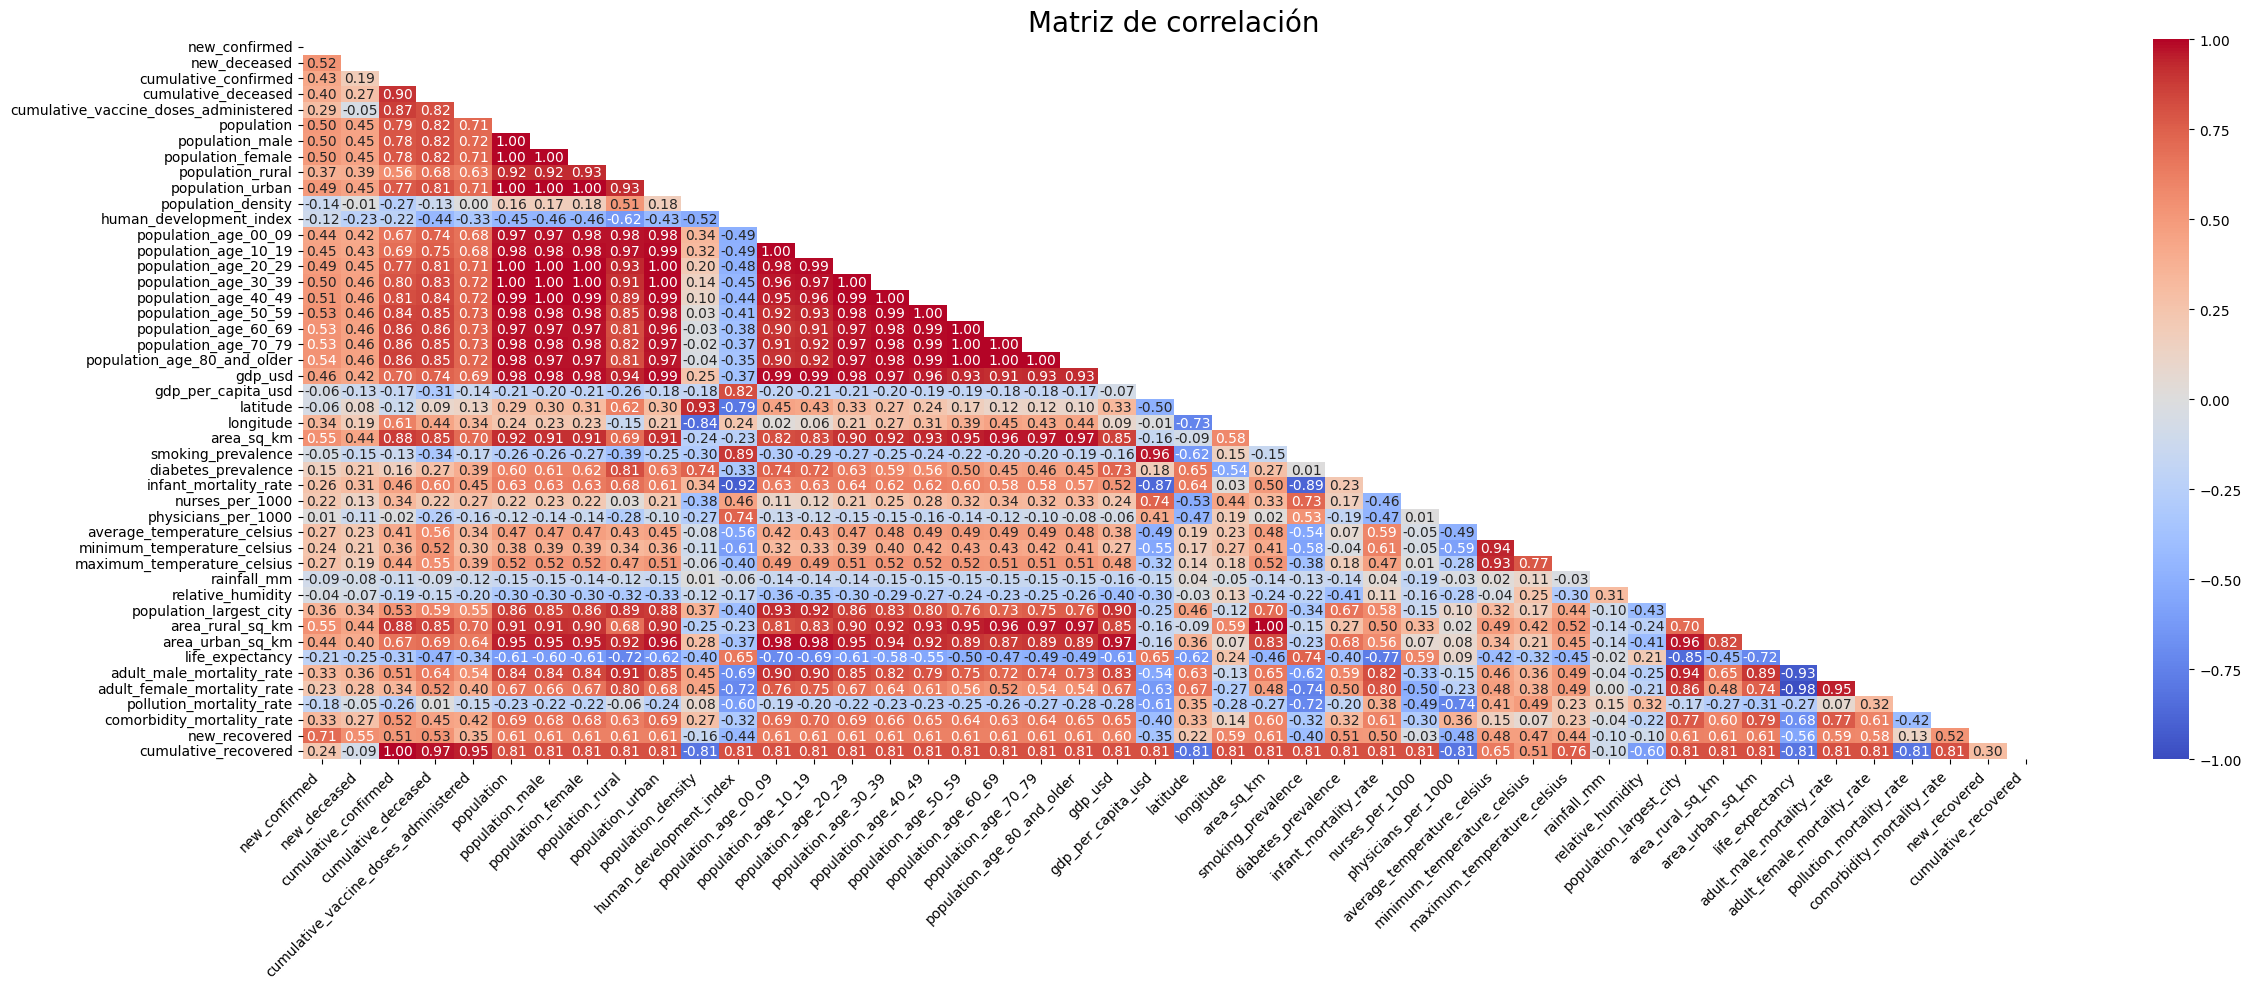

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Leo el archivo del avance 1 y lo guardo el df_Latam 
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Crear matriz de correlación y selecciono solo columnas numericas
numeric_columns = df_Latam.select_dtypes(include=['float64', 'int64']).columns
#el resultado es una tabla cuadrada entre 1 y -1
correlation_matrix = df_Latam[numeric_columns].corr()

# CreO una máscara para mostrar solo la mitad de la matriz, asi se ve mas limpio
# np.ones_like crea una matriz llena de 1 con el mismo tamaño que la matriz de correlaciones.
# np.triu convierte la matriz en un triángulo superior (parte de arriba de la diagonal).
# mask oculta la mitad redundante de la matriz, porque en correlaciones la parte superior e inferior son simétricas.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Crear el mapa de calor
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', 
                      vmin=-1, vmax=1, annot_kws={"size": 10})

# Agrego título
plt.title("Matriz de correlación", fontsize=20)

# Diseño del gráfico
plt.xticks(rotation=45, ha='right')# rote las etiquetas del eje X para que no se encimen
plt.yticks(rotation=0)# Mantiene las etiquetas del eje Y horizontales
plt.tight_layout() # Ajusta el diseño para que no se corte nada 

# Mostrar gráfico
plt.show()

La matriz realizada revelan los siguientes hallazgos claves: 
1. Relación entre contagios y fallecimientos

Existe una correlación positiva moderada (≈0.52) entre los casos confirmados diarios y los fallecimientos diarios.

Esto confirma que a mayor número de contagios, tiende a aumentar la mortalidad, lo cual refleja la evolución esperada de la pandemia.

2. Población y magnitud de la pandemia

La población total y sus desagregaciones por grupo etario presentan correlaciones positivas con los casos y muertes acumuladas (≈0.45 – 0.53).

Esto evidencia que los países con mayor población reportan más casos y muertes en números absolutos, lo cual debe analizarse en términos relativos (tasas por cada 100.000 habitantes) para evitar sesgos.
3. Vacunación y contagios

La vacunación acumulada muestra una correlación positiva baja a moderada (≈0.29) con los casos confirmados.

Esto sugiere que los países más afectados implementaron campañas de vacunación más intensivas, aunque la relación no es directa ya que también influyen factores como la logística y la disponibilidad de dosis.

4. Densidad poblacional e índice de desarrollo humano

La densidad poblacional y el índice de desarrollo humano presentan correlaciones negativas leves con los contagios y muertes (≈-0.11 a -0.13).

Esto indica que ni la concentración urbana ni el nivel de desarrollo explican por sí solos la magnitud de la pandemia. En algunos países con alta densidad hubo control gracias a políticas sanitarias estrictas, mientras que otros con baja densidad tuvieron brotes significativos.

5. PIB y capacidad de respuesta

El PIB total (gdp_usd) muestra correlaciones positivas moderadas con casos y muertes (≈0.46), mientras que el PIB per cápita (gdp_per_capita_usd) presenta correlaciones débiles o negativas.

Esto refleja que los países con mayor economía absoluta reportaron más casos por su capacidad de testeo y registro, pero el ingreso per cápita no asegura menos contagios ni muertes.

6. Mortalidad por género

La mortalidad masculina y femenina están altamente correlacionadas entre sí (≈1).

Esto demuestra que la tasa de mortalidad se explica más por el contexto sanitario y socioeconómico general que por diferencias de género, siendo ambos afectados de manera similar en términos de tendencia.

Preparo el codigo, verifico nuevamente mi data antes de comenzar a realizar todas las graficas de mi interes. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar formatos básicos
df = df_Latam.copy()                         #Trabajo con una copia
df['date'] = pd.to_datetime(df['date'])      #Fecha en datetime
paises = ["Argentina","Brazil","Chile","Colombia","Mexico","Peru"]
df = df[df['country_name'].isin(paises)]     #Me quedo con países de interés

mensual = (
    df.set_index('date')
      .groupby('country_name')
      .resample('MS')                        #'MS' = inicio de mes
      [['new_confirmed','new_deceased','new_recovered',
        'cumulative_vaccine_doses_administered']]
      .sum()
      .reset_index()
)




Defino un diccionario por pais. Con el objetivo de que los paises tengan el mismo color en todos los graficos. 

In [94]:
# Colores fijos por país
colores = {
    "Brazil": "red",
    "Mexico": "green",
    "Argentina": "blue",
    "Colombia": "orange",
    "Chile": "purple",
    "Peru": "brown"
}


1) VACUNACION 

1.1)  Dosis acumuladas totales por país

C:\Users\usuario\AppData\Local\Temp\ipykernel_12680\1171205547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ultimo.index,


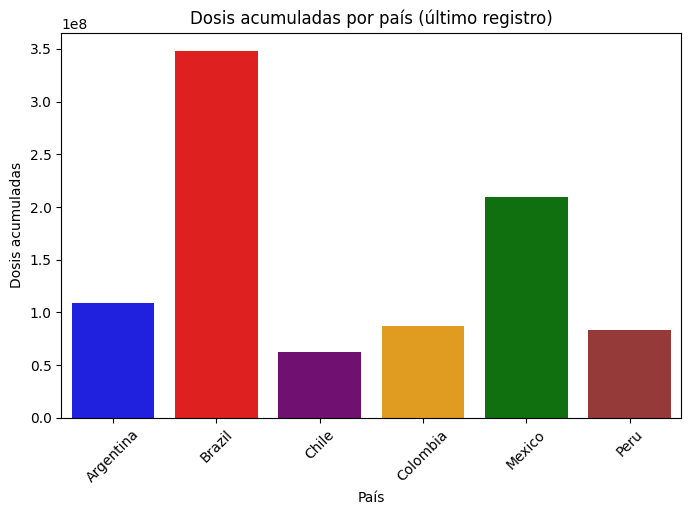

In [ ]:
# Agrupar por país y tomar el último valor (el mas reciente)
ultimo = df.groupby('country_name')['cumulative_vaccine_doses_administered'].last()

# Diseño del grafico
plt.figure(figsize=(8,5))
sns.barplot(x=ultimo.index, #sns fc de seaborn
            y=ultimo.values,
            palette=[colores[p] for p in ultimo.index])#paleta de colores segun diccionario 

plt.title('Dosis acumuladas por país (último registro)')#titulo del grafico
plt.xlabel('País')#nombre del eje x
plt.ylabel('Dosis acumuladas')#nombre del eje y
plt.xticks(rotation=45)#rota el nombre de paises
plt.show()#muestra el grafico


1.2) Evolución de las dosis acumuladas de vacunas por país a lo largo del tiempo

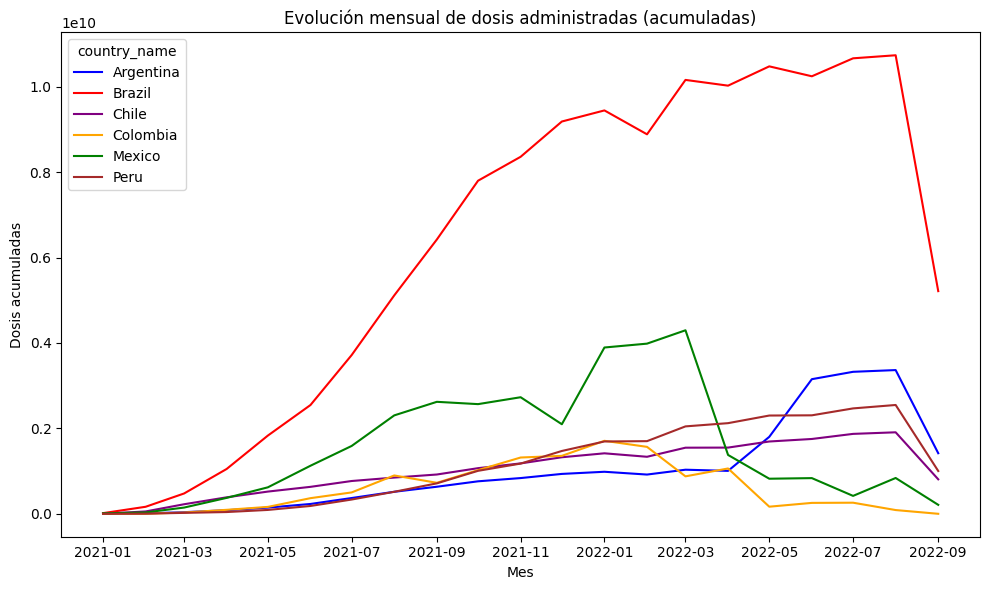

In [ ]:

plt.figure(figsize=(10,6))#creo la figura
sns.lineplot(data=mensual, x='date',
             y='cumulative_vaccine_doses_administered',
             hue='country_name', palette=colores)
plt.title('Evolución mensual de dosis administradas (acumuladas)')#agrego titulos y etiquetas
plt.xlabel('Mes'); plt.ylabel('Dosis acumuladas')
plt.tight_layout(); plt.show()#ajusto margenes y lo muestro 

2)  Epidemiologia: casos, muertes y recuperaciones 

2.1) Casos confirmados por mes y país

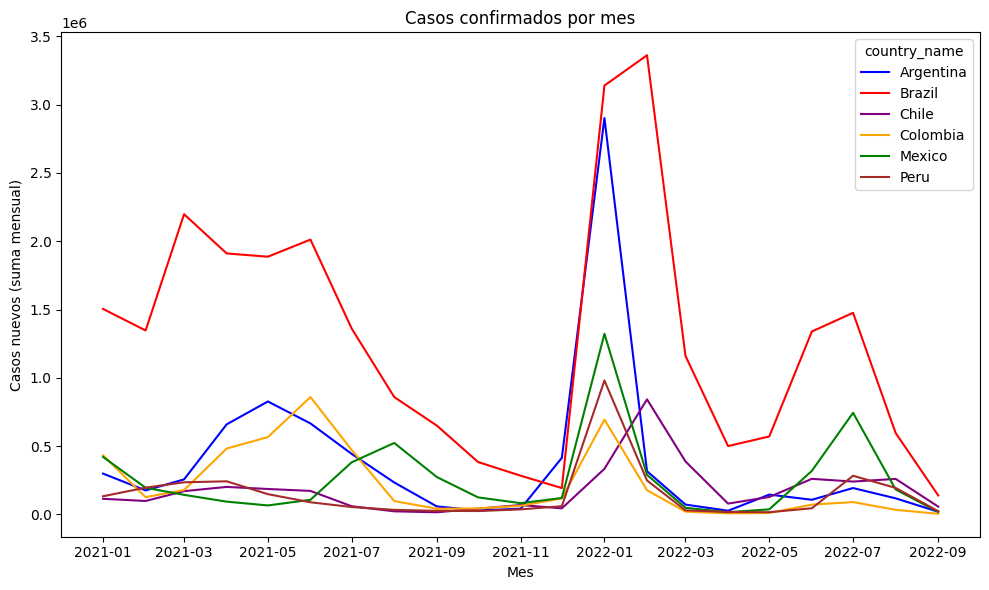

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mensual, x='date', y='new_confirmed',
             hue='country_name', palette=colores)
plt.title('Casos confirmados por mes')
plt.xlabel('Mes'); plt.ylabel('Casos nuevos (suma mensual)')
plt.tight_layout(); plt.show()#ajusto margenes y lo muestro 


2.2) Muertes por mes y país

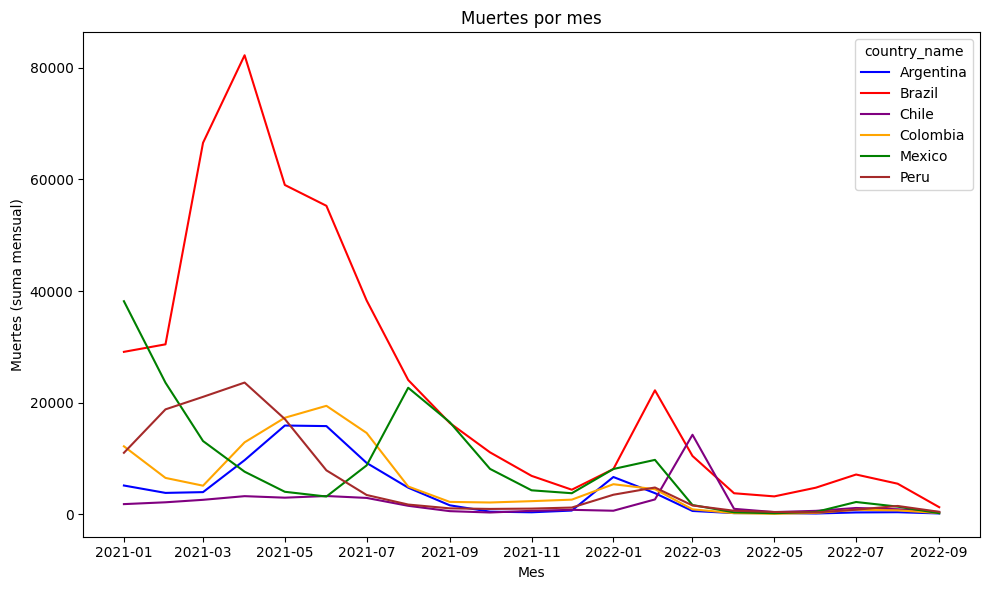

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mensual, x='date', y='new_deceased',
             hue='country_name', palette=colores)
plt.title('Muertes por mes')
plt.xlabel('Mes'); plt.ylabel('Muertes (suma mensual)')
plt.tight_layout(); plt.show()#ajusto margenes y lo muestro 



3) Graficas demograficas

3.1)Distribución de la Población por Edad en Países

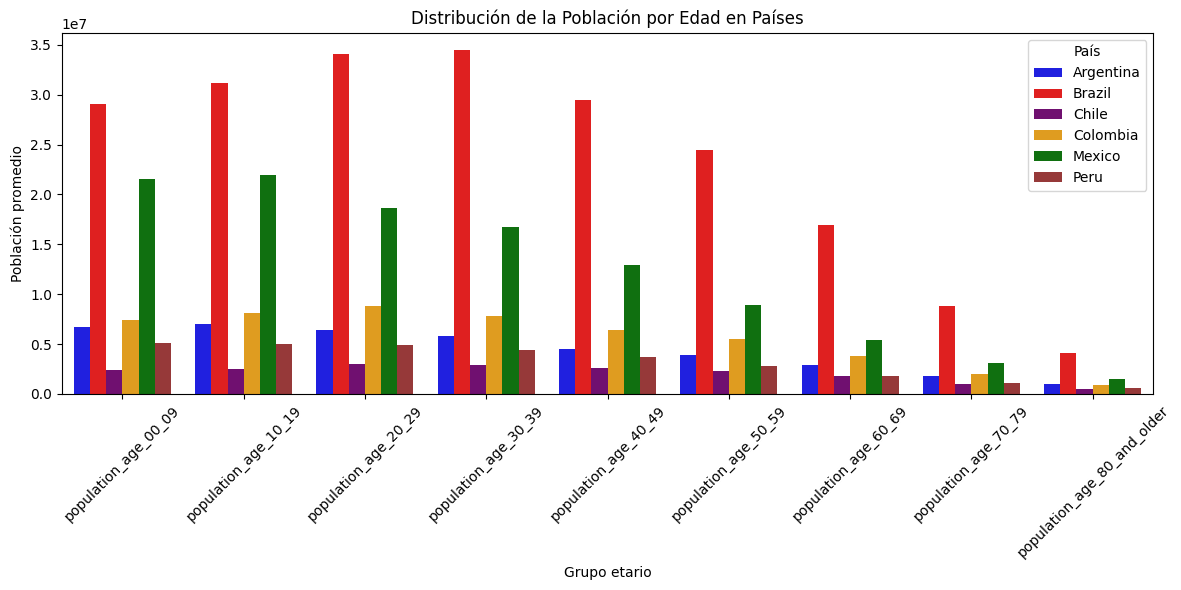

In [97]:

# Guardo en una lista las columnas que corresponden a grupos de edad
cols_edad = [
    'population_age_00_09','population_age_10_19','population_age_20_29',
    'population_age_30_39','population_age_40_49','population_age_50_59',
    'population_age_60_69','population_age_70_79','population_age_80_and_older'
]

# Agrupar por país y calcular el promedio de cada grupo etario
# (Uso promedio porque los datos pueden estar en varias filas por país y fecha)
poblacion_edad = df_Latam.groupby("country_name")[cols_edad].mean().reset_index()

# Transformar los datos a formato "largo" (más fácil de graficar en seaborn)
poblacion_melt = poblacion_edad.melt(
    id_vars="country_name",      # dejo el nombre del pais como identificador
    value_vars=cols_edad,        # las columnas de edad
    var_name="Grupo_Etario",     # cómo se llamara la columna de categorías
    value_name="Poblacion"       # cómo se llamara la columna con valores
)

#Crear gráfico de barras agrupadas
plt.figure(figsize=(12,6))
sns.barplot(
    data=poblacion_melt,
    x="Grupo_Etario", y="Poblacion",
    hue="country_name", palette=colores
)

#Personalizar el gráfico
plt.title("Distribución de la Población por Edad en Países")
plt.xlabel("Grupo etario")
plt.ylabel("Población promedio")
plt.xticks(rotation=45)# rotar etiquetas para que se lean mejor
plt.legend(title="País")
plt.tight_layout()#Definir las columnas que corresponden a grupos de edad
cols_edad = [
    'population_age_00_09','population_age_10_19','population_age_20_29',
    'population_age_30_39','population_age_40_49','population_age_50_59',
    'population_age_60_69','population_age_70_79','population_age_80_and_older'
]


3.2)Urbanización (población urbana y densidad)

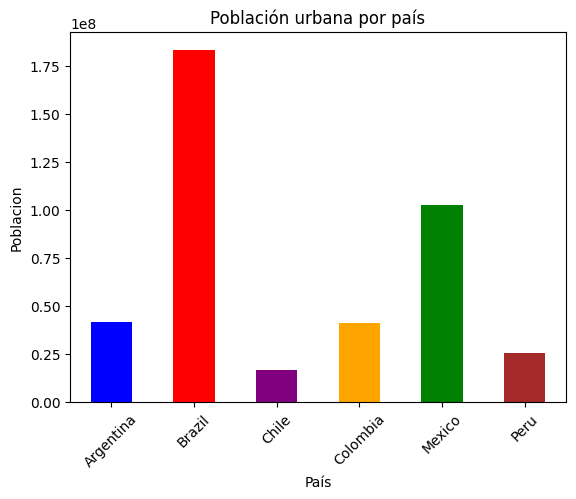

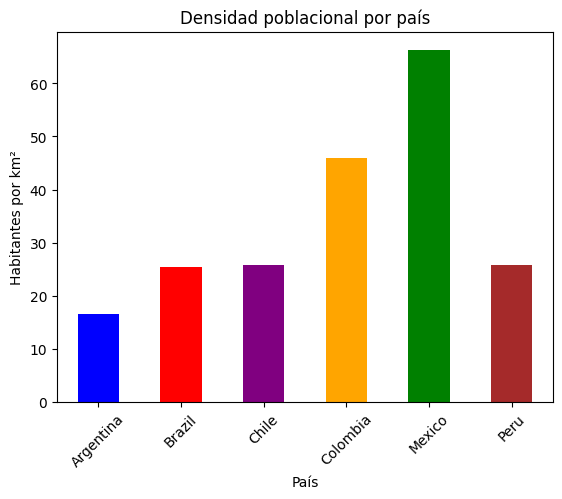

In [101]:
# Población urbana
urb = df_Latam.groupby("country_name")["population_urban"].mean()#agrupa por pais y toma la media 
#devuelve una serie don los paises y el valor de poblacion urbana promedio
urb.plot(
    kind="bar",#grafico de barras
    color=[colores[pais] for pais in urb.index]
)
plt.title("Población urbana por país")
plt.xlabel("País")
plt.ylabel("Poblacion")
plt.xticks(rotation=45)
plt.show()

# Densidad poblacional
dens = df_Latam.groupby("country_name")["population_density"].mean()

dens.plot(
    kind="bar",
    color=[colores[pais] for pais in dens.index]
)
plt.title("Densidad poblacional por país")
plt.xlabel("País")
plt.ylabel("Habitantes por km²")
plt.xticks(rotation=45)
plt.show()


Población urbana por país: Brasil y México concentran las mayores poblaciones urbanas, lo que sugiere que instalar laboratorios en sus ciudades principales tendría un mayor alcance. Chile y Perú tienen poblaciones urbanas más reducidas en comparación.
Densidad poblacional por país: México y Colombia presentan las densidades poblacionales más altas, lo que significa más personas en menos espacio. Esto puede incrementar la velocidad de propagación del virus, pero también concentrar la demanda de servicios sanitarios en áreas específicas.

4) PIB y Temperatura

4.1) PBI total 

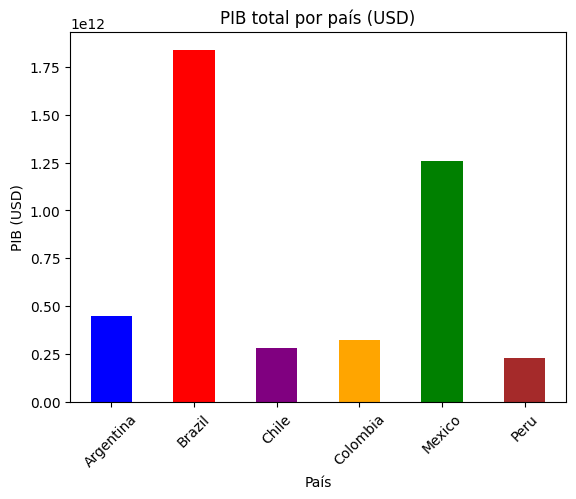

In [99]:
# PIB total por país
pib_total = df_Latam.groupby("country_name")["gdp_usd"].mean()#agrupo nombre del pais con gdp_usd y tomo la media del ultimo. 
pib_total.plot(
    kind="bar",
    color=[colores[pais] for pais in pib_total.index]
)
plt.title("PIB total por país (USD)")
plt.xlabel("País")
plt.ylabel("PIB (USD)")
plt.xticks(rotation=45)
plt.show()




PIB total por país:Brasil y México destacan con los mayores PIB totales, lo que refleja una capacidad económica general más alta para sostener infraestructura y proyectos a gran escala. Los demás países tienen economías más pequeñas en comparación. 

4.2) Temperatura promedio por país

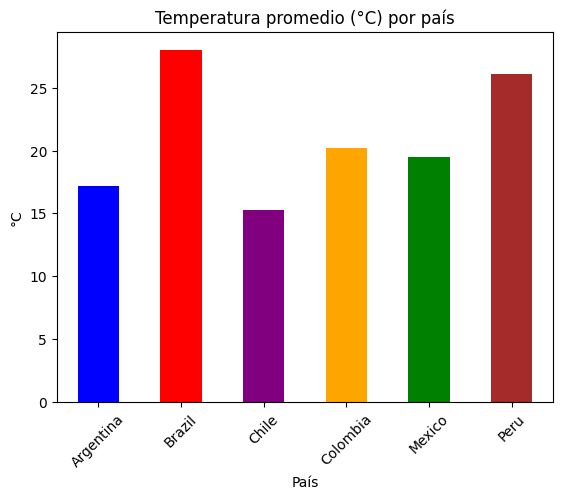

In [25]:
# Calcular la media de temperatura por país
temp_mean = df_Latam.groupby("country_name")["average_temperature_celsius"].mean()

# Gráfico con colores fijos del diccionario
temp_mean.plot(
    kind="bar",
    color=[colores[pais] for pais in temp_mean.index]
)

plt.title("Temperatura promedio (°C) por país")
plt.xlabel("País")
plt.ylabel("°C")
plt.xticks(rotation=45)
plt.show()




Temperatura promedio por país: Brasil y Perú muestran temperaturas promedio más elevadas, lo que implica mayores exigencias en la cadena de frío para vacunas. En contraste, Chile y Argentina presentan climas más templados, donde la conservación sería menos exigente.

5) Tasa de crecimiento (%)

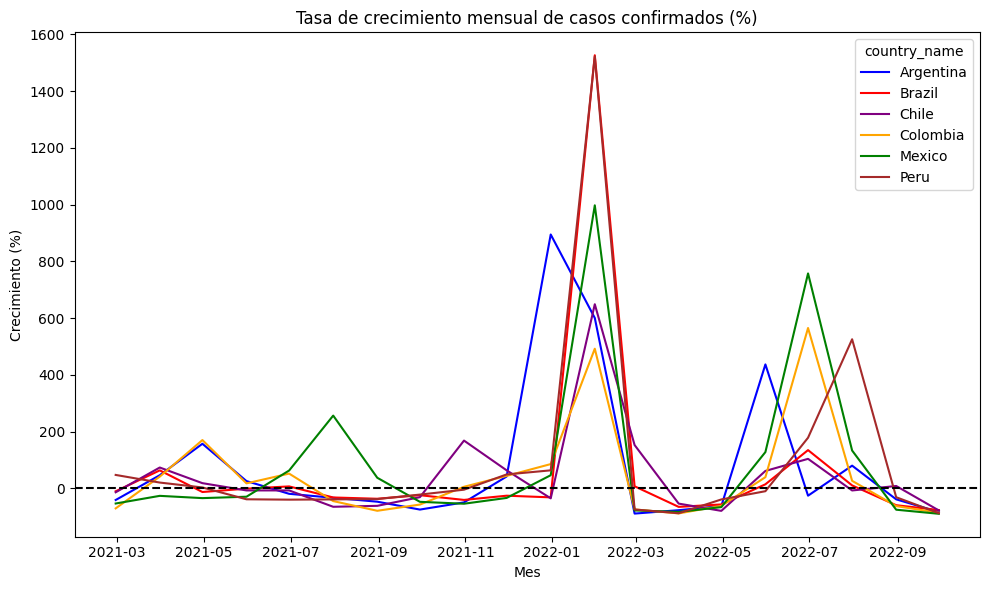

In [ ]:
# Calculo tasa de crecimiento respecto al mes anterior
mensual['growth_rate'] = mensual.groupby('country_name')['new_confirmed'].pct_change() * 100 
#Dentro de cada país, calcula el % de cambio mes a mes en new_confirmed

plt.figure(figsize=(10,6))
sns.lineplot(data=mensual, x='date', y='growth_rate',
             hue='country_name', palette=colores)

plt.title("Tasa de crecimiento mensual de casos confirmados (%)")
plt.xlabel("Mes")
plt.ylabel("Crecimiento (%)")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


Picos positivos: meses donde los casos se dispararon (ej. olas como Ómicron a inicios de 2022).
Valores negativos: meses de descenso tras una ola.

6) Relación entre vacunación y reducción de casos

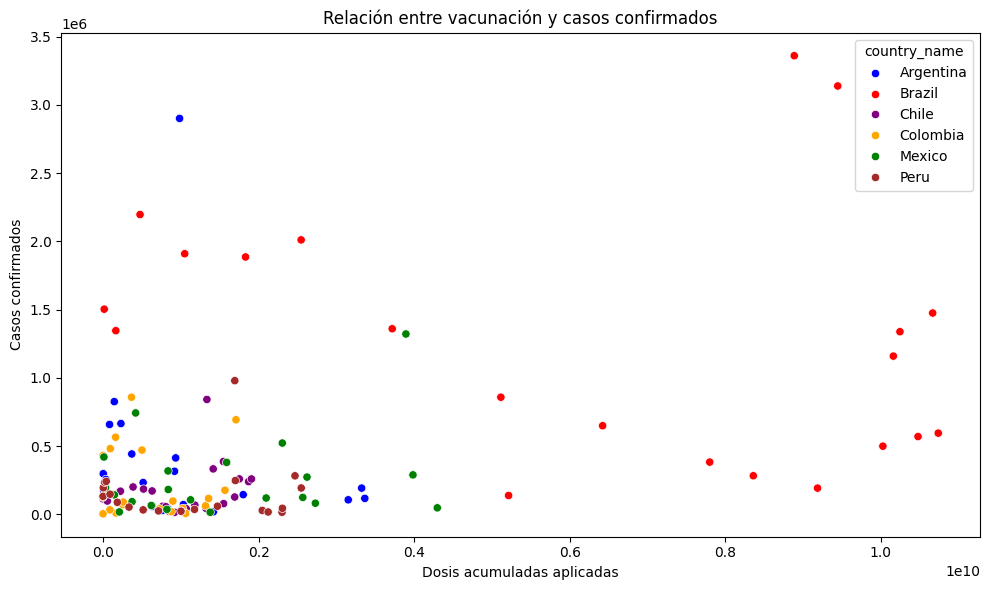

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=mensual,
                x='cumulative_vaccine_doses_administered',
                y='new_confirmed',
                hue='country_name',
                palette=colores)

plt.title("Relación entre vacunación y casos confirmados")
plt.xlabel("Dosis acumuladas aplicadas")
plt.ylabel("Casos confirmados")
plt.tight_layout()
plt.show()


Grafico de dispersión: cada punto es “un país en un mes” con su nivel de vacunación y sus casos.

7) Evolución de muertes diarias (Muestra la suma mensual de muertes)

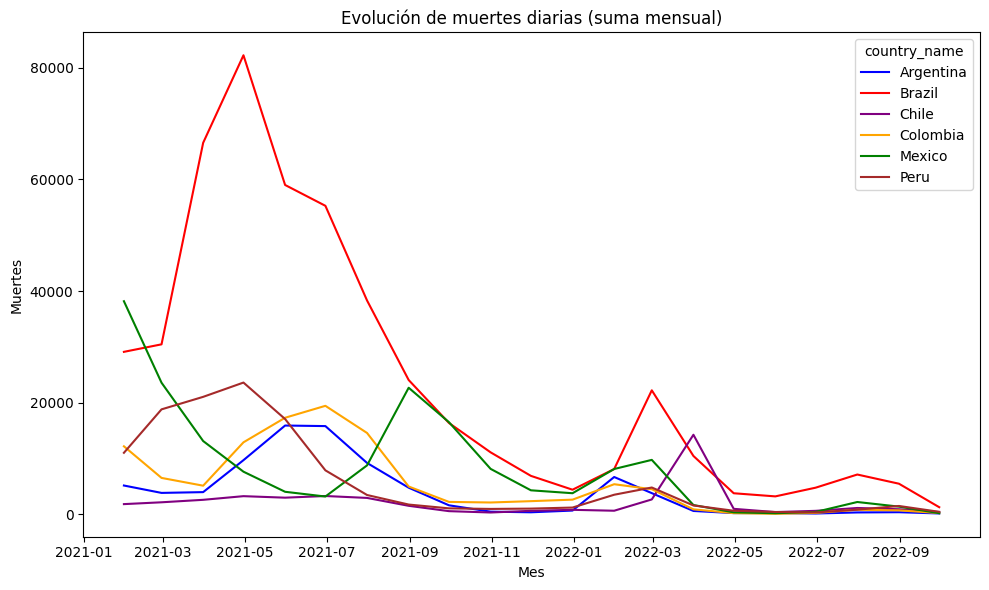

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mensual, x='date', y='new_deceased',
             hue='country_name', palette=colores)

plt.title("Evolución de muertes diarias (suma mensual)")
plt.xlabel("Mes")
plt.ylabel("Muertes")
plt.tight_layout()
plt.show()


8) Autocorrelación (ejemplo en Brasil)

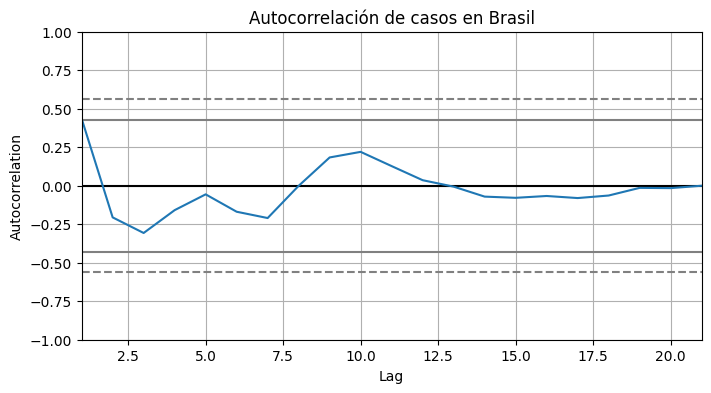

In [85]:
from pandas.plotting import autocorrelation_plot

# Autocorrelación de los casos en Brasil
brasil = mensual[mensual['country_name']=="Brazil"]

plt.figure(figsize=(8,4))
autocorrelation_plot(brasil['new_confirmed'])
plt.title("Autocorrelación de casos en Brasil")
plt.show()


9) Autocorrelación de casos en Argentina

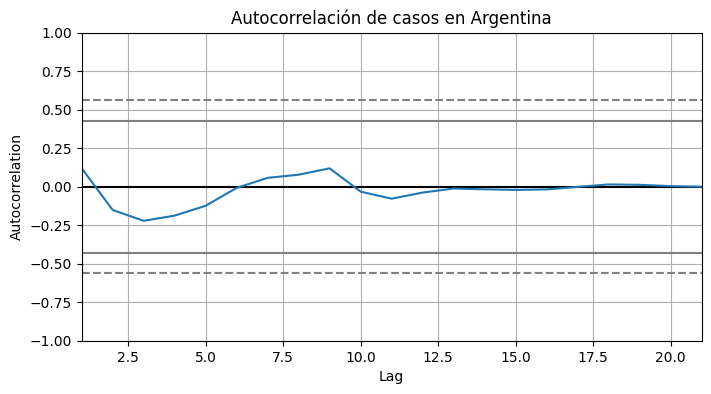

In [86]:
from pandas.plotting import autocorrelation_plot

# Filtro Argentina
arg = mensual[mensual['country_name']=="Argentina"]

plt.figure(figsize=(8,4))
autocorrelation_plot(arg['new_confirmed'])
plt.title("Autocorrelación de casos en Argentina")
plt.show()


10) Creacion de funciones 

1) Calcula el porcentaje de la población mayor de 60 años en un país.

In [87]:
# Función para calcular población mayor de 60 por país
def calcular_mayores60(df):
    cols_mayores = ["population_age_60_69",
                    "population_age_70_79",
                    "population_age_80_and_older"]
    
    # Agrupar y calcular promedio
    mayores_60 = df.groupby("country_name")[cols_mayores].mean()
    
    # Sumar columnas para total de mayores de 60
    mayores_60["total_mayores_60"] = mayores_60.sum(axis=1)
    
    return mayores_60[["total_mayores_60"]]


              total_mayores_60
country_name                  
Argentina            5725838.0
Brazil              29857440.0
Chile                3322634.0
Colombia             6696726.0
Mexico              10055379.0
Peru                 3497576.0


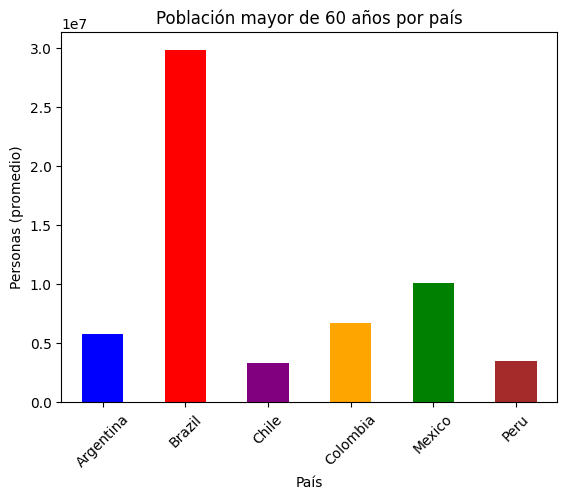

In [88]:
# Aplicar la función al DataFrame
mayores_60 = calcular_mayores60(df_Latam)

# Mostrar tabla
print(mayores_60)

# Graficar
mayores_60["total_mayores_60"].plot(
    kind="bar",
    color=[colores[pais] for pais in mayores_60.index]
)

plt.title("Población mayor de 60 años por país")
plt.xlabel("País")
plt.ylabel("Personas (promedio)")
plt.xticks(rotation=45)
plt.show()


2) PBI per capita 

In [89]:
# Función para calcular PIB per cápita por país
def calcular_pib_per_capita(df):
    # Agrupo por país y calculo el promedio del PIB per cápita
    pib_pc = df.groupby("country_name")["gdp_per_capita_usd"].mean()
    
    # Lo paso a DataFrame para que sea más fácil de usar y graficar
    return pib_pc.reset_index(name="pib_per_capita_usd")


  country_name  pib_per_capita_usd
0    Argentina             10006.0
1       Brazil              8717.0
2        Chile             14896.0
3     Colombia              6432.0
4       Mexico              9863.0
5         Peru              6977.0


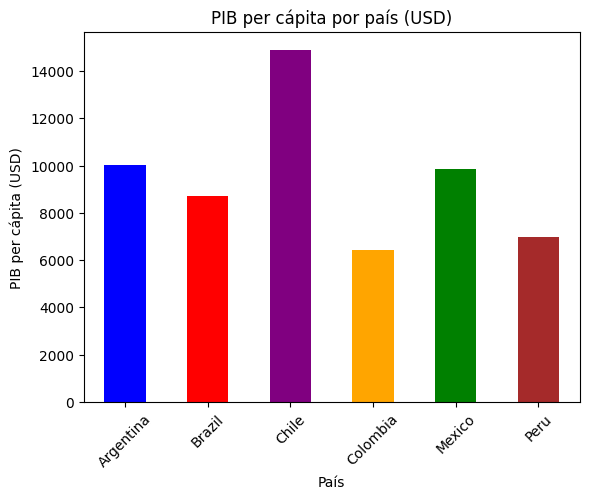

In [90]:
# Aplicar la función
pib_per_capita = calcular_pib_per_capita(df_Latam)

# Mostrar tabla
print(pib_per_capita)

# Graficar
pib_per_capita.plot(
    x="country_name",
    y="pib_per_capita_usd",
    kind="bar",
    color=[colores[pais] for pais in pib_per_capita["country_name"]],
    legend=False
)

plt.title("PIB per cápita por país (USD)")
plt.xlabel("País")
plt.ylabel("PIB per cápita (USD)")
plt.xticks(rotation=45)
plt.show()


PIB per cápita por país
Aunque Brasil tiene el PIB total más grande, Chile lidera en PIB per cápita, lo que indica un mejor nivel de ingresos y desarrollo económico por habitante. Esto puede favorecer la logística y el acceso a recursos.

11) Extra Credit

Para complementar los gráficos de barras y líneas, utilicé GeoPandas para crear mapas básicos que muestran la distribución geográfica de los casos, muertes y vacunación. No son interactivos, pero ayudan a visualizar rápidamente la situación por país.

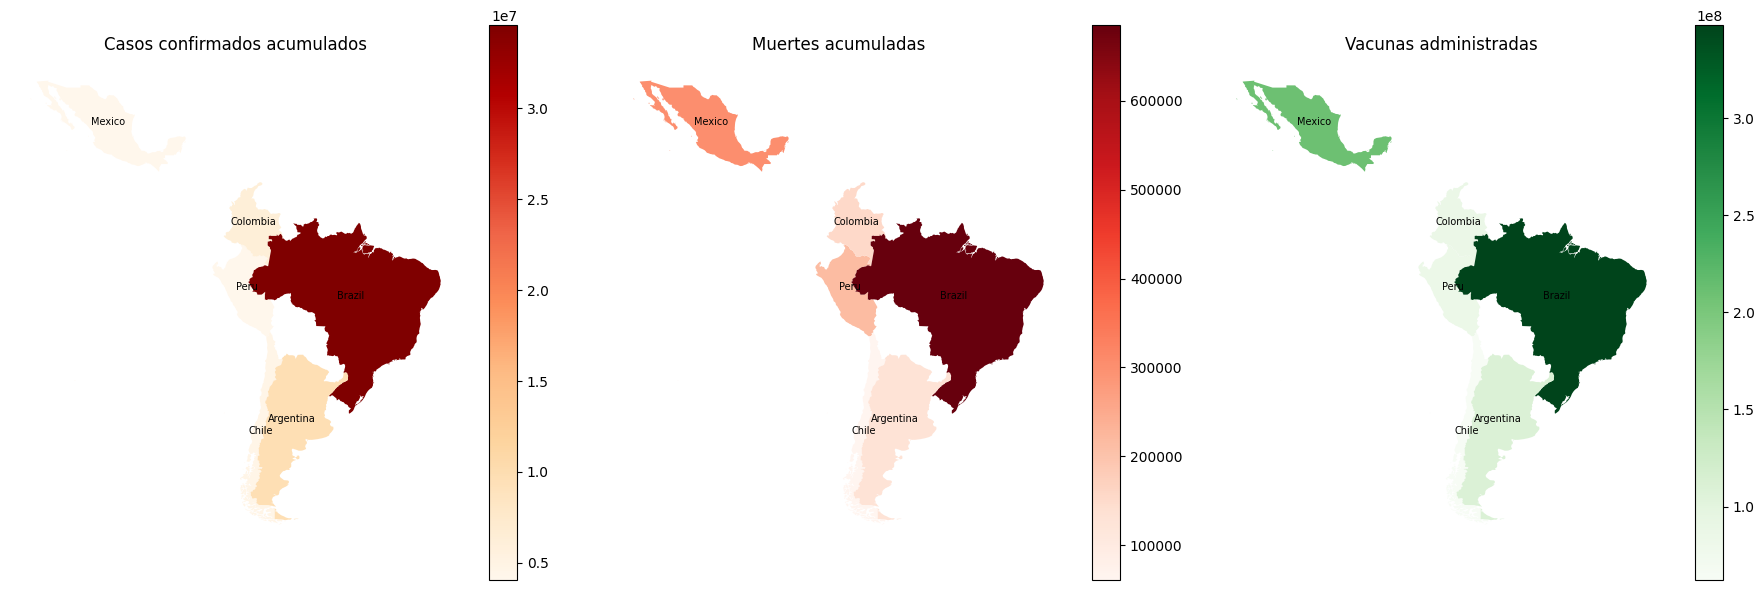

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) #Crea una figura con 1 fila y 3 columnas de ejes (subplots).
                                                #axes es un array con tres ejes: axes[0], axes[1], axes[2]

#Mapa 1: Casos confirmados
latam_mapa.plot(
    column="cumulative_confirmed",#colorea por la columna
    cmap="OrRd",#paleta de colores
    legend=True,
    ax=axes[0]
)
axes[0].set_title("Casos confirmados acumulados")# coloca titulo
axes[0].set_axis_off()  # Quitar ejes
for idx, row in latam_mapa.iterrows():
    axes[0].annotate(
        text=row["NAME"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=7, color="black"
    )

#Mapa 2: Muertes
latam_mapa.plot(
    column="cumulative_deceased",
    cmap="Reds",
    legend=True,
    ax=axes[1]
)
axes[1].set_title("Muertes acumuladas")
axes[1].set_axis_off()
for idx, row in latam_mapa.iterrows():
    axes[1].annotate(
        text=row["NAME"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=7, color="black"
    )

#Mapa 3: Vacunación
latam_mapa.plot(
    column="cumulative_vaccine_doses_administered",
    cmap="Greens",
    legend=True,
    ax=axes[2]
)
axes[2].set_title("Vacunas administradas")
axes[2].set_axis_off()
for idx, row in latam_mapa.iterrows():
    axes[2].annotate(
        text=row["NAME"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", fontsize=7, color="black"
    )

plt.tight_layout()
plt.show()


In [3]:
# Exportar dataset limpio en formato compatible con Power BI (español)
df_Latam.to_csv("data_latinoamerica_clean.csv",
                index=False,
                float_format="%.0f",  # elimina los .0
                decimal=",",          # decimal con coma (español)
                sep=";")              # columnas separadas por ;
